In [1]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [2]:
kx = 1.0
betx = 1.0
emitx = 1.0e-6
sigx = (emitx*betx)**0.5

ke = 2.5e6
mass = 938.272045e6
g = ke/mass+1.0
bg = (g**2-1.0)**0.5
emitn = emitx*bg

n=40
print(sigx)
pData = [0]*(n+1)
current = 0.06

0.001


In [3]:
const_focusing = impact.getElem('const_focusing')
loop = impact.getElem('loop')
const_focusing.length   = np.pi
const_focusing.n_sckick = ceil(const_focusing.length*20)
const_focusing.kx2 = kx**2
const_focusing.ky2 = kx**2
const_focusing.kz2 = 0.0
lattice = [loop, const_focusing]

In [4]:
beam = impact.getBeam()
beam.nCore_y = 4
beam.nCore_z = 4
beam.n_particles = 160000
beam.kinetic_energy = 100.0e6
beam.mass = mass
beam.frequency = 1.0
beam.distribution.distribution_type = 'Gauss'
beam.distribution.betx = betx
beam.distribution.bety = betx*2
beam.distribution.emitx = emitn
beam.distribution.emity = emitn*2
beam.distribution.emitz = 0.0

In [5]:
beam.mesh.fld_solver = 'Symplectic_Spectral_2D'
beam.mesh.mesh_x = 64
beam.mesh.mesh_y = 64
boundary_x: 0.016
beam.current = current

In [6]:
impact.writeInputFile(beam,lattice)
impact.run(beam)
pData[0]=impact.readParticleData(-111111,ke,mass,1)
pData[1]=impact.readParticleData(-111111,ke,mass,1)

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles
input error <- beam.multi_charge.current[0] not qual to beam.current
  ... enforcing  beam.multi_charge.current[0] to beam.current


In [7]:
beam.distribution.distribution_type='ReadFile'
for i in range(1,n):
    print(i)
    impact.writeParticleData(pData[i],ke,mass,1)
    impact.writeInputFile(beam,lattice)
    impact.run(beam)
    pData[i+1]=impact.readParticleData(-111111,ke,mass,1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [8]:
import pickle
with open('pData.I60mA.pickle', 'wb') as f:
    pickle.dump(pData, f)
    
with open('pData.I60mA.pickle', 'rb') as f:
    pData=pickle.load(f)

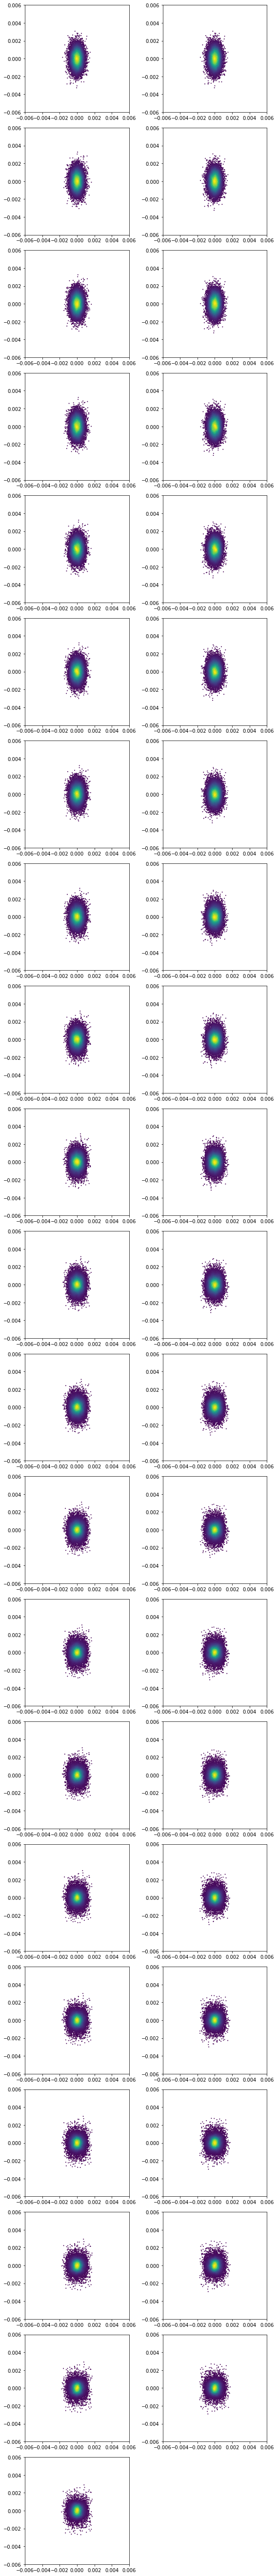

In [9]:
lim = (-6*sigx,6*sigx)
plt.figure(figsize=(8,ceil((n+1)/2)*3.5))
for i in range(n+1):
    plt.subplot(int(n/2)+1,2,i+1)
    impact.plot.poincare(pData[i][:,0],pData[i][:,2],samplePeriod=10,xlim=lim,ylim=lim)
plt.tight_layout()

In [10]:
print('')
for i in range(n+1):
    print(str(i)+'pi')


0pi
1pi
2pi
3pi
4pi
5pi
6pi
7pi
8pi
9pi
10pi
11pi
12pi
13pi
14pi
15pi
16pi
17pi
18pi
19pi
20pi
21pi
22pi
23pi
24pi
25pi
26pi
27pi
28pi
29pi
30pi
31pi
32pi
33pi
34pi
35pi
36pi
37pi
38pi
39pi
40pi


In [11]:
print(r'$\psi$')

$\psi$
